# Rhyming score experiments

This notebook is for rhyming score experiments. HAMR 2016.

In [1]:
import string

import nltk
import numpy

# For plotting outputs, we'll need
import matplotlib.pyplot as plt
# To display the plotted images inside the notebook:
%matplotlib inline
# Plotting the figures at a reasonable size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)

# Dirty, dirty trick
from rhyme import *

In [2]:
cmudict = collections.defaultdict(list)
for word, syl in nltk.corpus.cmudict.entries():
    cmudict[word].append(syl)

In [3]:
bad_text = 'I see all I know all For i am the the oracle Give me your hand' \
    ' I see caked blood on concrete Dead bodies on grass' \
    ' Mothers crying seeing babies lowered caskets'
    
good_text = 'Yeah, yeah It\'s the return of the Wild Style fashionist' \
' Smashin hits, make it hard to adapt to this Put pizazz and jazz in this, and cash in this' \
' Mastered this, flash this and make em clap to this DJ\'s throw on cuts and obey the crowd' \
' Just pump the volume up, and play it loud'

In [4]:
def tokenize(text):
    tokens = nltk.tokenize.wordpunct_tokenize(text.translate(None, string.punctuation).lower())
    return tokens

In [5]:
bad_words = tokenize(bad_text)
good_words = tokenize(good_text)

In [6]:
def rhyme_score_grid(words, prondict, pair_score_fn=pron_bleu):
    """Visualizes the pairwise rhyming scores."""
    pair_scores, pair_prons = word_rhyming_table(words, prondict=prondict, pair_score_fn=pair_score_fn)

    score_grid = numpy.zeros((len(words), len(words))) - 1.0
#     word_idx = {w: i for i, w in enumerate(words)}

    for i1, w1 in enumerate(words):
        for i2, w2 in enumerate(words):
            # check if it's there
            key = w1, w2
            if (w1, w2) not in pair_scores:
                if (w2, w1) not in pair_scores:
                    continue
                else:
                    key = w2, w1
            s = pair_scores[key]
            score_grid[i1, i2] = s
            score_grid[i2, i1] = s
        
    return score_grid

def pairwise_grid_stats(score_grid, words):
    minimum = score_grid.min()
    maximum = score_grid.max()
    print('Range: {0} -- {1}'.format(minimum, maximum))

def pairwise_rhyme_visualization(score_grid, words, show=True):

    fig, ax = plt.subplots()
    heatmap = ax.pcolor(score_grid, cmap=plt.cm.Blues)

    ax.set_xlim(len(words))
    ax.set_ylim(len(words))
    
    # put the major ticks at the middle of each cell
    ax.set_xticks(numpy.arange(score_grid.shape[0])+0.5, minor=False)
    ax.set_yticks(numpy.arange(score_grid.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(words, minor=False)
    ax.set_yticklabels(words, minor=False)

    if show:
        plt.show()



Range: -1.0 -- 0.840896415254


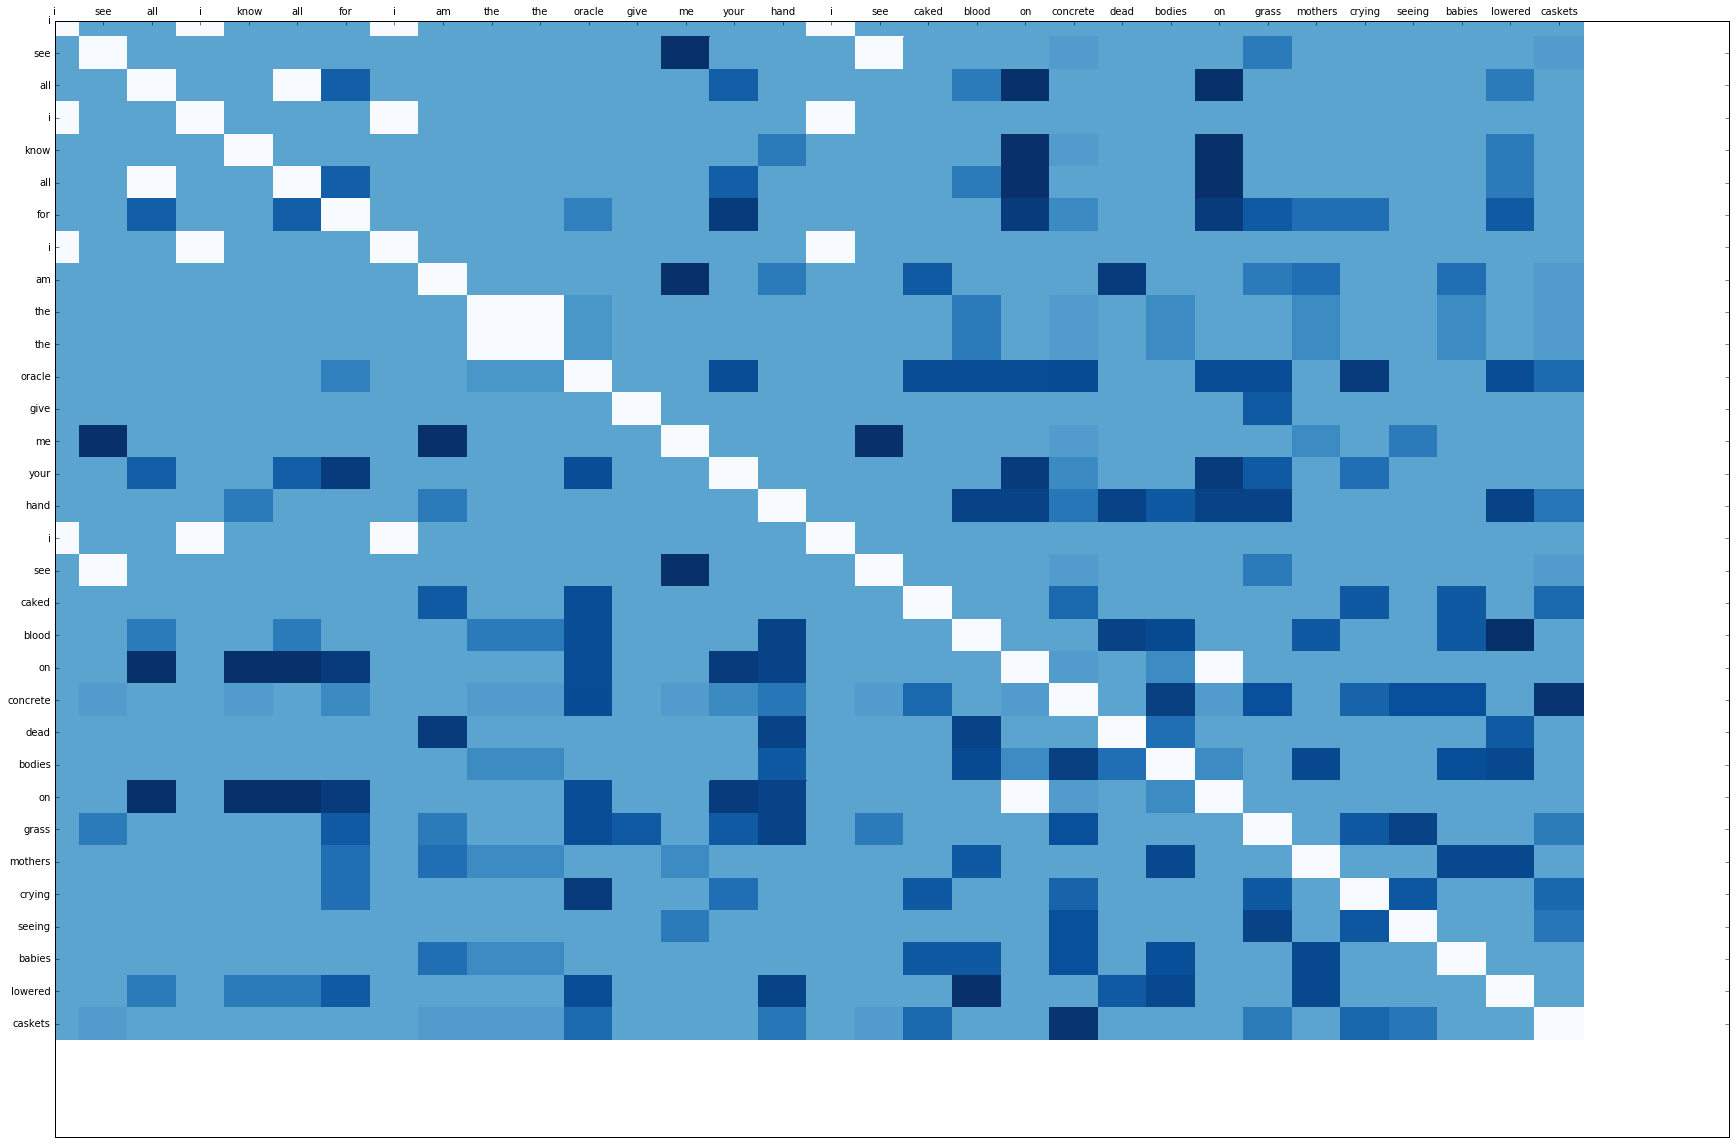

In [7]:
score_grid = rhyme_score_grid(bad_words, prondict=cmudict)
stats = pairwise_grid_stats(score_grid, bad_words)
pairwise_rhyme_visualization(score_grid, bad_words)

Range: -1.0 -- 1.0


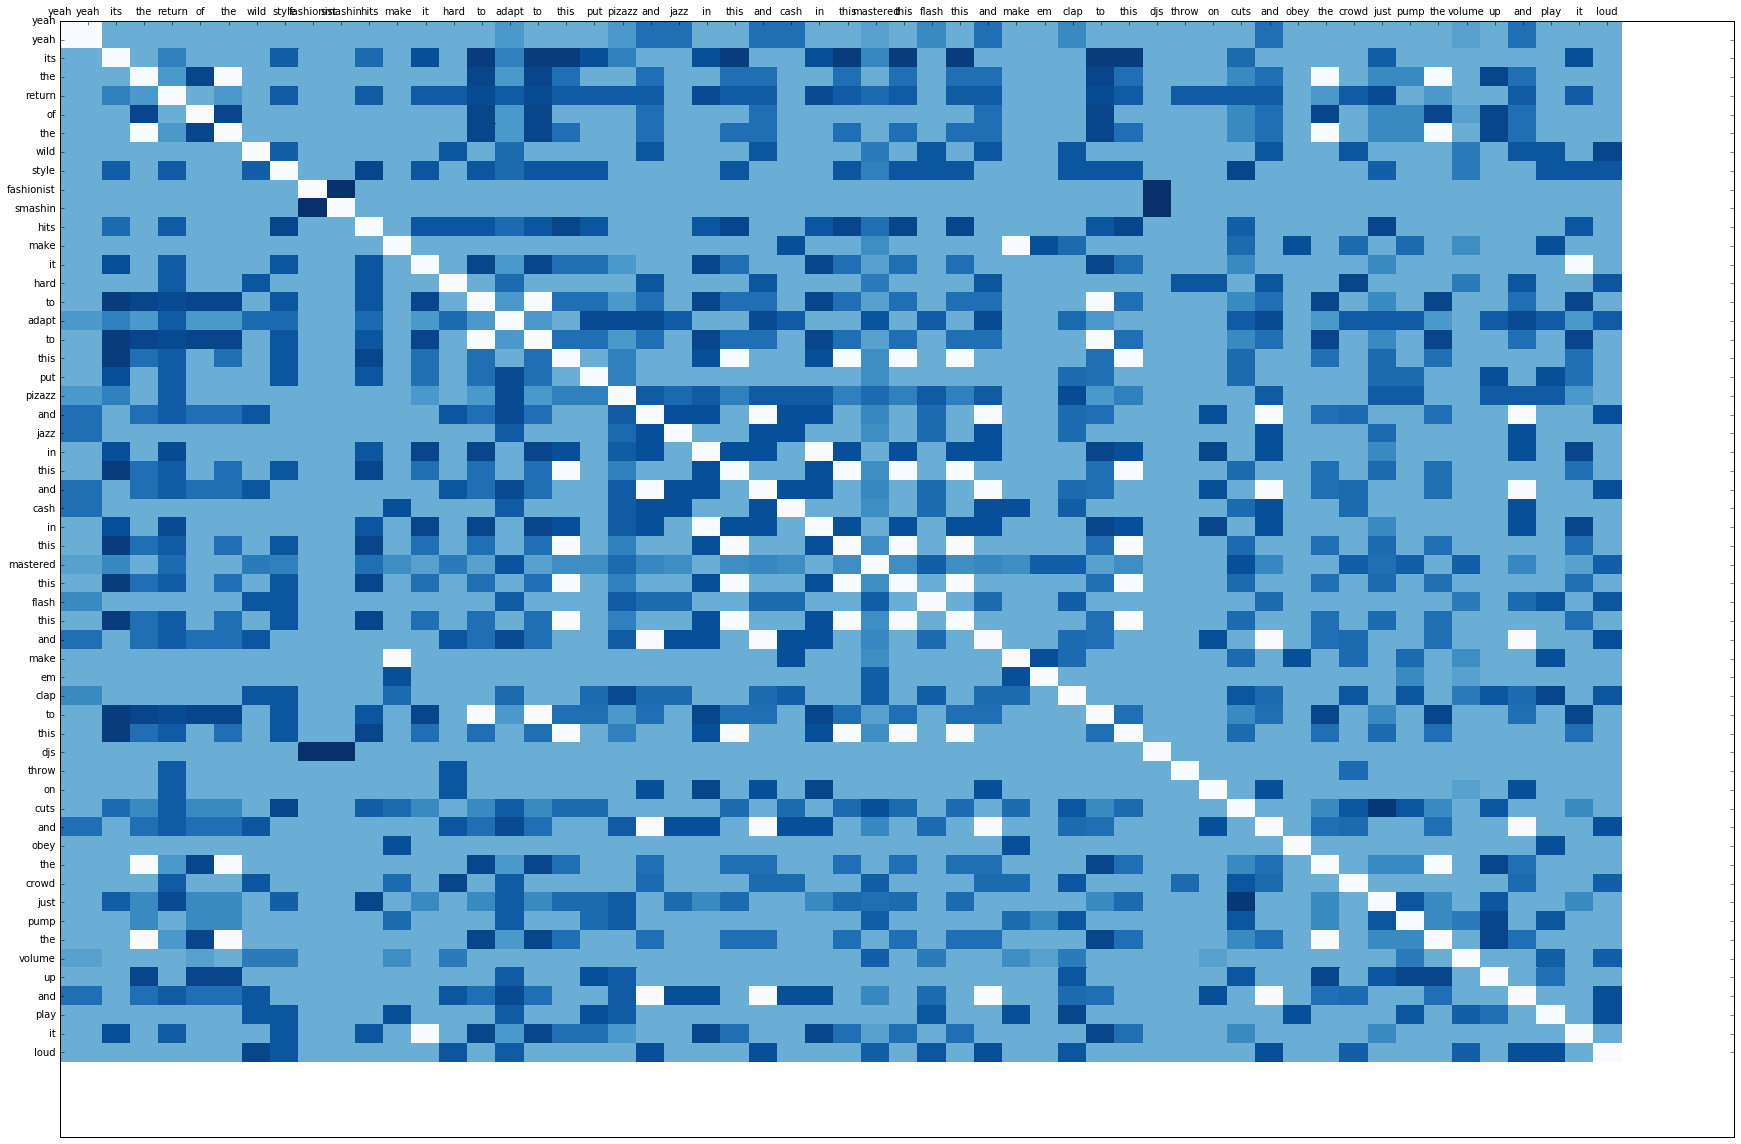

In [8]:
score_grid = rhyme_score_grid(good_words, prondict=cmudict)
stats = pairwise_grid_stats(score_grid, good_words)
pairwise_rhyme_visualization(score_grid, good_words)